In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Porcine survival rate .xlsx')
df.columns = df.iloc[0]
df = df.iloc[1:].drop_duplicates().reset_index(drop=True).drop('survival rate ',axis=1)
df['Died '] = df['Died '].diff().shift(-1).fillna(0)
df['Total'] = df.iloc[:,1]+df.iloc[:,3]
df['Total Event'] = df.iloc[:,2]+df.iloc[:,4]
df

,Time (hrs),Survived,Died,Survived,Died,Total,Total Event
0,0,15,0,16,0,31,0
1,1,15,0,16,0,31,0
2,2,15,0,16,0,31,0
3,3,15,0,16,0,31,0
4,4,15,3,16,0,31,3
5,4,12,0,16,0,28,0
6,5,12,4,16,0,28,4
7,5,8,0,16,0,24,0
8,6,8,3,16,2,24,5
9,6,5,0,14,0,19,0


### The Kaplan-Meier 

curve is commonly used to analyze time-to-event data, such as the time until death or the time until a specific event occurs. For this, the Kaplan Meier curve graphically represent the survival rate or survival function. Time is plotted on the x-axis and the survival rate is plotted on the y-axis.

With the Kaplan-Meier approach, the survival probability is computed using 

S(t) = S(t-1)*[1-D(t)/N(t)]

In [3]:
treatment1 = df.iloc[:,:3]
treatment2 = df.iloc[:,3:-2]
treatment2['Time (hrs)'] = treatment1['Time (hrs)']

treatment1

,Time (hrs),Survived,Died
0,0,15,0
1,1,15,0
2,2,15,0
3,3,15,0
4,4,15,3
5,4,12,0
6,5,12,4
7,5,8,0
8,6,8,3
9,6,5,0


In [4]:
# Calculate Kaplan Miere Survival Probability

treatment1['survival rate'] = 0
treatment1['survival rate'][0]=1

for i in range(1,len(treatment1)):
    treatment1['survival rate'][i] = treatment1['survival rate'][i-1]*(1-treatment1['Died '][i]/treatment1['Survived '][i])
    
treatment2['survival rate'] = 0
treatment2['survival rate'][0]=1

for i in range(1,len(treatment2)):
    treatment2['survival rate'][i] = treatment2['survival rate'][i-1]*(1-treatment2['Died '][i]/treatment2['Survived '][i])
    
treatment2

,Survived,Died,Time (hrs),survival rate
0,16,0,0,1.0000
1,16,0,1,1.0000
2,16,0,2,1.0000
3,16,0,3,1.0000
4,16,0,4,1.0000
5,16,0,4,1.0000
6,16,0,5,1.0000
7,16,0,5,1.0000
8,16,2,6,0.8750
9,14,0,6,0.8750


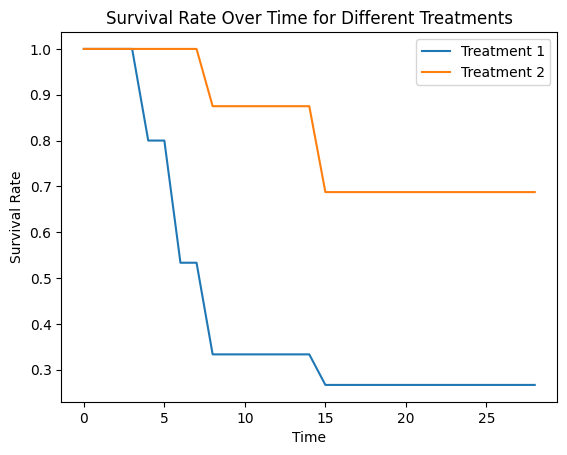

In [5]:
# plot the survival curve for the 2 treatments

plt.plot(treatment1['survival rate'], label='Treatment 1')
plt.plot(treatment2['survival rate'], label='Treatment 2')

plt.xlabel('Time')
plt.ylabel('Survival Rate')
plt.title('Survival Rate Over Time for Different Treatments')
plt.legend()  # Show legend with labels

plt.show()

### The Log Rank Test
1. The log rank test is a popular test to test the null hypothesis of no difference in survival between two or more independent groups. The test compares the entire survival experience between groups and can be thought of as a test of whether the survival curves are identical (overlapping) or not. Survival curves are estimated for each group, considered separately, using the Kaplan-Meier method and compared statistically using the log rank test. 

2. The null hypothesis is that there is no difference in survival between the two groups or that there is no difference between the populations in the probability of death at any point. The log rank test is a non-parametric test and makes no assumptions about the survival distributions. 

3. In essence, the log rank test compares the observed number of events in each group to what would be expected if the null hypothesis were true (i.e., if the survival curves were identical).

H0: The two survival curves are identical (or S1t = S2t) 

Vs

H1: The two survival curves are not identical (or S1t ≠ S2t, at any time t) (α=0.05).

The log rank statistic is approximately distributed as a chi-square test statistic. 

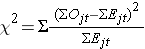

where ΣOjt represents the sum of the observed number of events in the jth group over time (e.g., j=1,2) 
and ΣEjt represents the sum of the expected number of events in the jth group over time.


In [6]:
df2 = df[(df.iloc[:, 2] != 0) | (df.iloc[:, 4] != 0)]
df2

,Time (hrs),Survived,Died,Survived,Died,Total,Total Event
4,4,15,3,16,0,31,3
6,5,12,4,16,0,28,4
8,6,8,3,16,2,24,5
15,12,5,1,14,3,19,4


In [7]:
treatment1 = df2.iloc[:, 1:3].rename(columns=lambda x: ' treatment 1 (' + x+')')
treatment2 = df2.iloc[:, 3:5].rename(columns=lambda x: ' treatment 2 (' + x+')')
treatment = pd.concat([treatment1,treatment2],axis=1)

treatment = pd.concat([df2.iloc[:,:1],treatment],axis=1)
treatment = pd.concat([treatment,df2.iloc[:,5:]],axis=1)
treatment

,Time (hrs),treatment 1 (Survived ),treatment 1 (Died ),treatment 2 (Survived ),treatment 2 (Died ),Total,Total Event
4,4,15,3,16,0,31,3
6,5,12,4,16,0,28,4
8,6,8,3,16,2,24,5
15,12,5,1,14,3,19,4


1.  total the number at risk,   

      N(t) = treatment 1 (Survived ) + treatment 2 (Survived ), at each event time 
      
      ,
      
 
 2. the number of observed events (deaths), 
 
     O(t) = treatment 1 (Died )	+ treatment 2 (Died), at each event time

In [8]:
# Event means Number of Dead
treatment['expected events treatment 1'] = treatment[' treatment 1 (Survived )']*treatment['Total Event']/treatment['Total']
treatment['expected events treatment 2'] = treatment[' treatment 2 (Survived )']*treatment['Total Event']/treatment['Total']

treatment

,Time (hrs),treatment 1 (Survived ),treatment 1 (Died ),treatment 2 (Survived ),treatment 2 (Died ),Total,Total Event,expected events treatment 1,expected events treatment 2
4,4,15,3,16,0,31,3,1.451613,1.548387
6,5,12,4,16,0,28,4,1.714286,2.285714
8,6,8,3,16,2,24,5,1.666667,3.333333
15,12,5,1,14,3,19,4,1.052632,2.947368


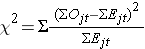

In [9]:
x1 = ((treatment[' treatment 1 (Died )'].sum()-treatment['expected events treatment 1'].sum())**2)/treatment['expected events treatment 1'].sum()
x2 =  ((treatment[' treatment 2 (Died )'].sum()-treatment['expected events treatment 2'].sum())**2)/treatment['expected events treatment 2'].sum()

chi_square  = x1+x2

chi_square

7.031684865072672

The test statistic is approximately distributed as chi-square with 1 degree of freedom. 

For this test the decision rule is to Reject H0 if chi-square > 3.84. We observe Χ2 = 7.03, which exceeds the critical value of 3.84. 

Therefore, we reject H0. We have significant evidence, α=0.05, to show that the two survival curves are different. 
